# Librerie

In [1]:
import pandas as pd
import numpy as np
import holidays
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from datetime import datetime, timedelta
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Importazione dataset e preprocessing

In [2]:
# Reading dataset
df = pd.read_csv('data2022_train.csv').rename(columns={'Unnamed: 0': 'time', 'y': 'power'})
df['time'] = pd.to_datetime(df['time'])
df

,time,power
0,2017-01-01 00:00:00,34055.69620
1,2017-01-01 00:10:00,29814.68354
2,2017-01-01 00:20:00,29128.10127
3,2017-01-01 00:30:00,28228.86076
4,2017-01-01 00:40:00,27335.69620
...,...,...
48091,2017-11-30 23:10:00,31347.69231
48092,2017-11-30 23:20:00,30603.07692
48093,2017-11-30 23:30:00,29889.23077
48094,2017-11-30 23:40:00,29249.23077


# Plot serie temporale

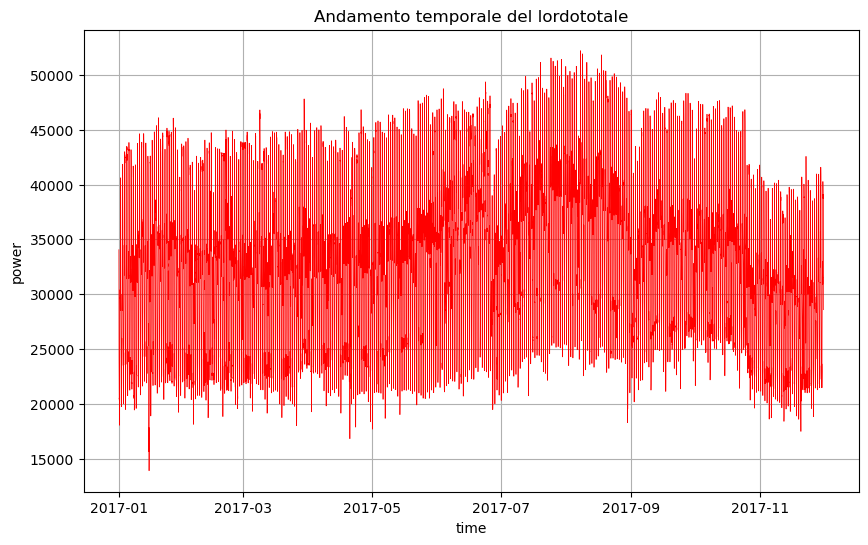

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(df['time'],df['power'],
         color='red', linewidth=0.5)
plt.title('Andamento temporale del lordototale')
plt.xlabel('time')
plt.ylabel('power')
plt.grid(True)
# Salvo il grafico
#plt.savefig('power.png', dpi=300, bbox_inches='tight')
plt.show()

# Divisione training e test

In [4]:
italian_holidays = holidays.Italy()
# Extracting features from dates
df['Month'] = df['time'].dt.month
df['Year'] = df['time'].dt.year
df['Weekday'] = df['time'].dt.weekday
df['Hour'] = df['time'].dt.hour
df['Quarter'] = df['time'].dt.quarter
df['Day'] = df['time'].dt.day
df['Day_of_year'] = df['time'].dt.dayofyear
df['Weekend'] = df['time'].dt.weekday.isin([5, 6]).astype(int)
df['holidays'] = df['time'].apply(lambda x: 1 if x in italian_holidays else 0)

# Selecting columns
df = df[['Year', 'Month', 'Weekday', 'Hour', 'Quarter', 'Day', 'Day_of_year', 'Weekend', 'holidays', 'power']]
df

,Year,Month,Weekday,Hour,Quarter,Day,Day_of_year,Weekend,holidays,power
0,2017,1,6,0,1,1,1,1,1,34055.69620
1,2017,1,6,0,1,1,1,1,1,29814.68354
2,2017,1,6,0,1,1,1,1,1,29128.10127
3,2017,1,6,0,1,1,1,1,1,28228.86076
4,2017,1,6,0,1,1,1,1,1,27335.69620
...,...,...,...,...,...,...,...,...,...,...
48091,2017,11,3,23,4,30,334,0,0,31347.69231
48092,2017,11,3,23,4,30,334,0,0,30603.07692
48093,2017,11,3,23,4,30,334,0,0,29889.23077
48094,2017,11,3,23,4,30,334,0,0,29249.23077


In [5]:
# Preparing data for training and testing
X = df.drop('power', axis=1)
y = df['power']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Printing train and test set size
print(f'Train set size: {len(X_train)}')
print(f'Test set size: {len(X_test)}')

Train set size: 38476
Test set size: 9620


# ML models comparison

In [6]:
# Defining function for ML models comparison
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Training model
    model.fit(X_train, y_train)

    # Prediction on test set
    predictions = model.predict(X_test)

    # Metrics
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mae = mean_absolute_error(y_test, predictions)
    mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

    # Printing metrics
    print(f'Root Mean Squared Error: {rmse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Absolute Percentage Error: {mape:.2f}%')

    return rmse, mae, mape

# Choosing different ML models
models = [RandomForestRegressor(n_estimators=100, random_state=42),
          LinearRegression(),
          GradientBoostingRegressor(n_estimators=100, random_state=42),
          DecisionTreeRegressor(random_state=42)]

# Models comparison
for model in models:
    print(f'\nEvaluating {model.__class__.__name__}:\n')
    evaluate_model(model, X_train, y_train, X_test, y_test)


Evaluating RandomForestRegressor:

Root Mean Squared Error: 1147.4670059410134
Mean Absolute Error: 730.8782383134594
Mean Absolute Percentage Error: 2.28%

Evaluating LinearRegression:

Root Mean Squared Error: 4821.274250116008
Mean Absolute Error: 3847.9396417817516
Mean Absolute Percentage Error: 12.28%

Evaluating GradientBoostingRegressor:

Root Mean Squared Error: 2089.9449257067845
Mean Absolute Error: 1526.6890719757434
Mean Absolute Percentage Error: 4.80%

Evaluating DecisionTreeRegressor:

Root Mean Squared Error: 1154.9362779523972
Mean Absolute Error: 734.1409074705879
Mean Absolute Percentage Error: 2.29%


# Computing selected model

In [7]:
# Training the selected model (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Computing again prediction on test set for visualization
test_predictions = model.predict(X_test)

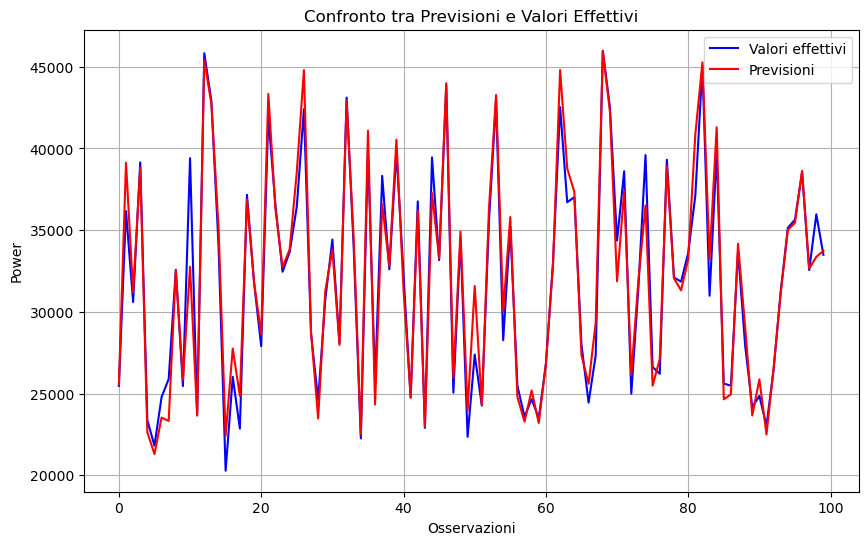

In [9]:
# Plotting some values for visual comparison
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[0:100], label='Valori effettivi', linestyle='-', color='b')
plt.plot(test_predictions[0:100], label='Previsioni', linestyle='-', color='r')

plt.title('Confronto tra Previsioni e Valori Effettivi')
plt.xlabel('Osservazioni')
plt.ylabel('Power')
plt.legend()
plt.grid(True)
# Saving plot
plt.savefig('ML_predictions.png', dpi=300, bbox_inches='tight')
plt.show()

# December predictions

In [25]:
# Defining date input format
date_format = "%Y-%m-%d %H:%M:%S"
# Starting date
start_date = datetime(2017, 12, 1, 0, 0, 0)
num_intervals = 4320
# Creaating timestamps
timestamps = [start_date + timedelta(minutes=i*10) for i in range(num_intervals)]

december_data = {
    'time': timestamps,
}

# Creating december dataframe for future predictions
december_df = pd.DataFrame(december_data)

december_df['Year'] = december_df['time'].dt.year
december_df['Month'] = december_df['time'].dt.month
december_df['Weekday'] = december_df['time'].dt.weekday
december_df['Hour'] = december_df['time'].dt.hour
december_df['Quarter'] = december_df['time'].dt.quarter
december_df['Day'] = december_df['time'].dt.day
december_df['Day_of_year'] = december_df['time'].dt.dayofyear
december_df['Weekend'] = december_df['time'].dt.weekday.isin([5, 6]).astype(int)
december_df['holidays'] = december_df['time'].apply(lambda x: 1 if x in italian_holidays else 0)
december_df = december_df.drop('time', axis=1)
december_df

,Year,Month,Weekday,Hour,Quarter,Day,Day_of_year,Weekend,holidays
0,2017,12,4,0,4,1,335,0,0
1,2017,12,4,0,4,1,335,0,0
2,2017,12,4,0,4,1,335,0,0
3,2017,12,4,0,4,1,335,0,0
4,2017,12,4,0,4,1,335,0,0
...,...,...,...,...,...,...,...,...,...
4315,2017,12,5,23,4,30,364,1,0
4316,2017,12,5,23,4,30,364,1,0
4317,2017,12,5,23,4,30,364,1,0
4318,2017,12,5,23,4,30,364,1,0


In [32]:
# Adding predictions to december_df
december_predictions = model.predict(december_df)
december_df['Predicted_Power'] = december_predictions
december_df

,Year,Month,Weekday,Hour,Quarter,Day,Day_of_year,Weekend,holidays,Predicted_Power
0,2017,12,4,0,4,1,335,0,0,26089.071394
1,2017,12,4,0,4,1,335,0,0,26089.071394
2,2017,12,4,0,4,1,335,0,0,26089.071394
3,2017,12,4,0,4,1,335,0,0,26089.071394
4,2017,12,4,0,4,1,335,0,0,26089.071394
...,...,...,...,...,...,...,...,...,...,...
4315,2017,12,5,23,4,30,364,1,0,30343.942369
4316,2017,12,5,23,4,30,364,1,0,30343.942369
4317,2017,12,5,23,4,30,364,1,0,30343.942369
4318,2017,12,5,23,4,30,364,1,0,30343.942369


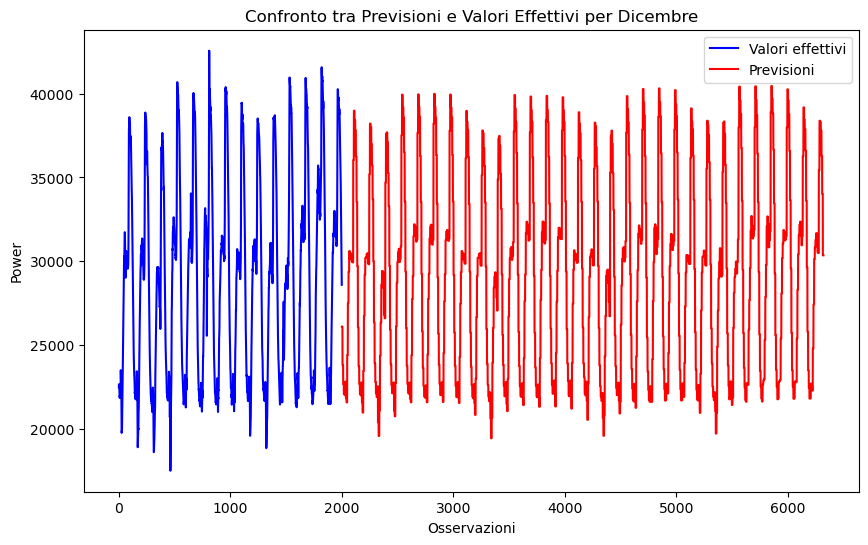

In [33]:
# Concatenating dataframes
combined_df = pd.concat([df[-2000:], december_df])

# CPLotting results
plt.figure(figsize=(10, 6))
plt.plot(combined_df['power'].values, label='Valori effettivi', linestyle='-', color='b')
plt.plot(combined_df['Predicted_Power'].values, label='Previsioni', linestyle='-', color='r')

plt.title('Confronto tra Previsioni e Valori Effettivi per Dicembre')
plt.xlabel('Osservazioni')
plt.ylabel('Power')
plt.legend()
# Saving plot
plt.savefig('ML_predictions_december.png', dpi=300, bbox_inches='tight')
plt.show()

# Prediction submission file

In [34]:
R_results = pd.read_csv('previsioni_modelli.csv').rename(columns={'fit': 'UCM', 'ARIMA': 'ARIMA'})

results = {
    'date': timestamps,
    'ARIMA': R_results['ARIMA'].values,
    'UCM': R_results['UCM'].values,
    'ML': december_df["Predicted_Power"] .values
}

results_df = pd.DataFrame(results)
results_df.to_csv("838138_20240124.csv", index=False)
results_df

,date,ARIMA,UCM,ML
0,2017-12-01 00:00:00,27955.912339,27743.103296,26089.071394
1,2017-12-01 00:10:00,27546.913748,27023.339285,26089.071394
2,2017-12-01 00:20:00,26890.283948,26359.302065,26089.071394
3,2017-12-01 00:30:00,26526.430670,25756.565866,26089.071394
4,2017-12-01 00:40:00,26238.300900,25217.432842,26089.071394
...,...,...,...,...
4315,2017-12-30 23:10:00,31042.706545,31817.443975,30343.942369
4316,2017-12-30 23:20:00,30380.571836,30980.105011,30343.942369
4317,2017-12-30 23:30:00,29642.823617,30141.225973,30343.942369
4318,2017-12-30 23:40:00,29050.030560,29313.579457,30343.942369
